In [1]:
%matplotlib inline

# Tema: Support Vector Machines

En esta notebook, utilizaremos el dataset "empty.all.csv" que contiene como clase positiva, 900 artículos de Wikipedia en inglés que presentan la falla "Empty Section" y como clase negativa, contiene 900 artículos destacados. El mismo se encuentra en el subdirectorio "miscelaneos" del repositorio Github. Los datos se cargan como un DataFrame mediante un método de la biblioteca seaborn. A tal fin es necesario copiar el dataset en el home local de seaborn. Por defecto usa ~/seaborn-data/, en Windows:  "C:\Users\Nbre_Usuario\seaborn-data".

## Ejemplos

In [2]:
import seaborn as sns
empty = sns.load_dataset('empty.all',cache=True)
empty.head()

,wordSyllables,wordLength,wordCount,weaselWordRate,triviaSectionsCount,to_be_verbRate,templateCount,tableCount,syllableCount,subsubsectionLength,...,characterCount,categoryCount,brokenLinkCount,bormuth,auxiliaryVerbRate,ari,anonymousEditorRate,agePerEdit,age,has_flaw
0,1.000000,3.021739,46,0.000000,0,0.000000,16,0,46,38.0956,...,139,2,0,-0.287230,0,4.302391,0.000000,135.307692,1759,yes
1,2.000000,7.500000,4,0.000000,0,0.000000,16,0,8,38.0956,...,30,2,0,0.399001,0,14.395000,0.000000,175.900000,1759,yes
2,1.642857,5.714286,14,0.000000,0,0.000000,25,0,23,38.0956,...,80,5,0,9.555114,0,6.359286,4.347826,76.478261,1759,yes
3,1.642857,5.714286,14,0.000000,0,0.000000,23,0,23,38.0956,...,80,5,0,9.555114,0,6.359286,0.000000,54.968750,1759,yes
4,1.902256,5.393484,399,0.250627,0,3.759398,37,1,759,38.0956,...,2152,4,0,5.678890,0,10.408792,3.947368,35.026316,2662,yes


In [3]:
list(empty.columns.values)

['wordSyllables',
 'wordLength',
 'wordCount',
 'weaselWordRate',
 'triviaSectionsCount',
 'to_be_verbRate',
 'templateCount',
 'tableCount',
 'syllableCount',
 'subsubsectionLength',
 'subsubsectionCount',
 'subsectionNesting',
 'subsectionLength',
 'subsectionCount',
 'stopwordRate',
 'smogIndex',
 'shortestSubsubsectionLength',
 'shortestSubsectionLength',
 'shortestSentenceLength',
 'shortestSectionLength',
 'shortSentenceRate',
 'sentenceLength',
 'sentenceCount',
 'sentenceBeginSubordinatingConjunctionRate',
 'sentenceBeginPronounRate',
 'sentenceBeginPrepositionRate',
 'sentenceBeginInterrogativePronounRate',
 'sentenceBeginCoordinatingConjunctionRate',
 'sentenceBeginArticleRate',
 'sectionNesting',
 'sectionLength',
 'sectionCount',
 'registeredEditorRate',
 'referenceWordRate',
 'referenceSectionsCount',
 'referenceSectionRate',
 'referenceCount',
 'reciprocity',
 'questionRate',
 'questionCount',
 'pronounRate',
 'prepositionRate',
 'peacockWordRate',
 'passiveSentenceRate',

In [4]:
empty.shape

(1800, 96)

In [5]:
X_empty = empty.drop('has_flaw', axis=1)
X_empty.shape

(1800, 95)

In [6]:
y_empty = empty['has_flaw']
y_empty.shape

(1800,)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_empty, y_empty, random_state=0)

In [8]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (1350, 95)
y_train shape: (1350,)


In [9]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (450, 95)
y_test shape: (450,)


In [10]:
from sklearn import svm
modelSVM = svm.SVC(gamma=0.001,C=256)
modelSVM.fit(X_train, y_train)

SVC(C=256, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
y_model = modelSVM.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.5955555555555555

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_model))

             precision    recall  f1-score   support

         no       0.55      1.00      0.71       220
        yes       1.00      0.21      0.35       230

avg / total       0.78      0.60      0.52       450



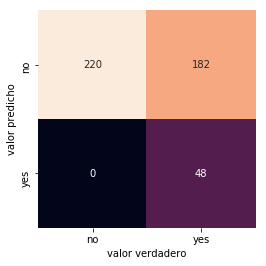

In [14]:
target_names = ['no', 'yes']

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model)

sns.heatmap(mat.T, square=True, annot=True, cbar=False, fmt="d", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('valor verdadero')
plt.ylabel('valor predicho');

